# Load dataset

In [1]:
import pandas as pd

data = pd.read_csv("../data/train.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data cleaning

## Handling missing data

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# # Impute missing values (if any)
# data.fillna(data.median(), inplace=True)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## Handling outliers

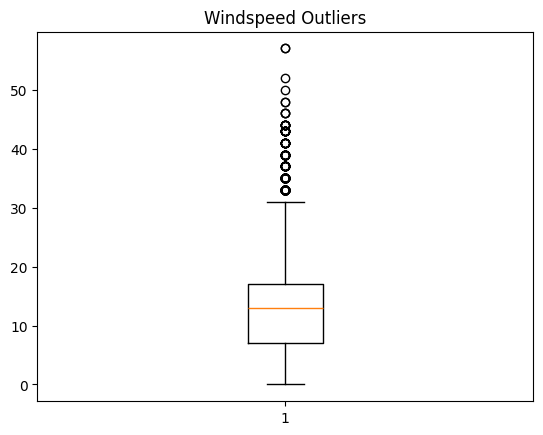

In [3]:
import matplotlib.pyplot as plt

# Box plot to detect outliers in windspeed
plt.boxplot(data['windspeed'])
plt.title('Windspeed Outliers')
plt.show()

# Cap windspeed at a maximum threshold if necessary
data['windspeed'] = data['windspeed'].clip(upper=40)


## Erroneous values

In [4]:
# Remove rows with negative or erroneous values
data = data[data['temp'] >= 0]

# Feature Engineering

## Datetime features

In [5]:
# Convert 'datetime' column to datetime object
data['datetime'] = pd.to_datetime(data['datetime'])

# Create new features
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month


## Weather patterns

In [6]:
# Create binary weather features
data['is_clear_weather'] = (data['weather'] == 1).astype(int)
data['is_rainy_weather'] = (data['weather'] >= 3).astype(int)

## Holiday and working day interactions

In [7]:
# Create a combined feature for holidays and working days
data['is_holiday_workingday'] = ((data['holiday'] == 1) & (data['workingday'] == 1)).astype(int)

## Drop unwanted cols

In [8]:
data.drop(columns=["datetime"], inplace=True)

# Split the dataset

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop(columns=["count"])  # Features (all columns except 'count')
y = data["count"]  # Target variable

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (8708, 16)
Testing data size: (2178, 16)
